In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#setting up the size of the figures
plt.rcParams['figure.figsize']=(16,5)
#setting up the style of the plot
plt.style.use('fivethirtyeight')

In [3]:
#for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [4]:
#for EDA
import sweetviz

In [5]:
#for machine learning
import sklearn
import imblearn

In [6]:
#reading the dataset
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [7]:
#let's examine the dataset
print("shape of training data:",train.shape)
print("shape of testing data:",test.shape)

shape of training data: (54808, 14)
shape of testing data: (23490, 13)


In [8]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
#lets check the tail of the dataset
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


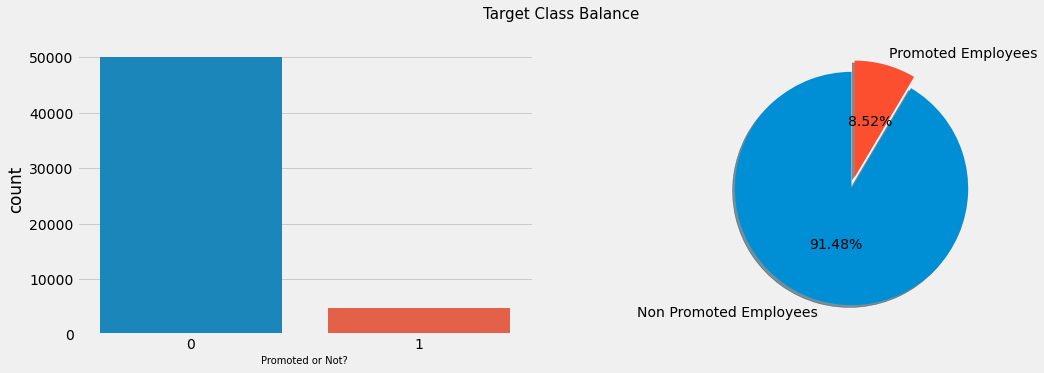

In [11]:
#lets do some visualization
plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%',
                                         startangle = 90,
                                       labels = ['Non Promoted Employees',
                                                 'Promoted Employees'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [12]:
#here we can see that the data is very imbalanced
#only aproxx 9% employees got promotion
#so we have to balance the dataset


In [13]:
#lets make a report using sweetviz "its very useful" for complteb EDA
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "is_promoted")
my_report.show_html("Report.html")

:FEATURES DONE:                    |█████████████████████| [100%]   00:12  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [14]:
# lets check descriptive statistics for numerical columns
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [15]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [17]:
# Lets make an interactive function to check the statistics of these numerical columns at a time
#using interact feature of ipywidgets
@interact
def check(column = list(train.select_dtypes('number').columns[1:])):
    print("Maximum Value :", train[column].max())
    print("Minimum Value :", train[column].min())
    print("Mean : {0:.2f}".format(train[column].mean()))
    print("Median :", train[column].median())
    print("Standard Deviation :  {0:.2f}".format(train[column].std()))

interactive(children=(Dropdown(description='column', options=('no_of_trainings', 'age', 'previous_year_rating'…